# Recreating Crystallography Plane Groups in Python

In this project, we will attempt to create an image of a few 2D plane groups that are common in crystal structures! This can be accomplished by using matrix algebra, where the matrix contains the initial points of a shape that we create, as well as the mathematical operations required for rotation, translations, and reflection. These operations are required to model the orientations of a shape in crystal structures! This code is geared towards those who have a little bit of experience in coding, an understanding of basic geometric transformations, and some experience with matrix algebra and are looking to challenge themselves. 

First, we need to import all the necessary packages to use in this code. 

In [1]:
import sympy as sp
import numpy as np
from math import sqrt
import math
from PIL import Image, ImageDraw

## Practicing With Transformation Matrices

Before we get into writing the code to generate these plane groups, let's first talk about some basic transformations and how they are represented in matrix form to apply on the points. More specifically, we can look at ways to rotate a vector (0,1). 

### Rotation

To rotate a vector (0,1), we can a general rotation matrix. 
$$\begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}$$

We can select any value for theta and apply it to a vector. In the example below, we write a function *rotation2D* to ask the user what angle (in degrees) they would like to rotate the vector by. This code converts an input in degrees into radians and saves it in a new variable *radtheta.* This allow the operations *sin* and *cos* to run. It then generates an array that fills in theta value the user gave into the rotation matrix shown above. This array can be "dotted" with the specified vector array which is in this case, (0,1). The dot product of these two gives us the new *x* and *y* values of the vector after rotation. 

In the cell below, we can see this function be applied to an inputted angle of 0, 45, 60, 90, 180, and -270. The "n" is written after the *testArray* and *Rotation* to emphasize that this is a negative angle. 

In [3]:
#Defining Some Rotation Matrix with Angle Theta that will be applied to a specified vector (with specific coordinates) 
#to generate new points
def rotation2D(theta):
    radtheta = theta*(np.pi/180)
    return np.array([[np.cos(radtheta), np.sin(radtheta)],
                     [-np.sin(radtheta),  np.cos(radtheta)]])

#Now we are setting a value of 90 degrees to the rotation matrix, which will then be multiplied by a specified vector
#testArray is a rotation matrix with angle 90
testArray0 = rotation2D(0)
testArray0

#Now we are taking a vector [1,0] and multiplying (using dot product) that vector by the rotation matrix testArray 
Rotation0 = np.dot(np.array([1,0]),testArray0)
print(Rotation0)

#Now, let's rotate a vector 45 degrees 
testArray45 = rotation2D(45)
testArray45
Rotation45 = np.dot(np.array([1,0]), testArray45)
print(Rotation45)

testArray60 = rotation2D(60)
testArray60
Rotation60 = np.dot(np.array([1,0]), testArray60)
print(Rotation60)

testArray90 = rotation2D(90)
testArray90
Rotation90 = np.dot(np.array([1,0]), testArray90)
print(Rotation90)

testArray180 = rotation2D(180)
testArray180
Rotation180 = np.dot(np.array([1,0]), testArray180)
print(Rotation180)

#I wrote n in front of the angle to indicate -270
testArrayn270 = rotation2D(-270)
testArrayn270
Rotationn270 = np.dot(np.array([1,0]), testArrayn270)
print(Rotationn270)

[1. 0.]
[0.70710678 0.70710678]
[0.5       0.8660254]
[6.123234e-17 1.000000e+00]
[-1.0000000e+00  1.2246468e-16]
[-1.8369702e-16  1.0000000e+00]


We now have the new coordiates of the original vector (0,1) after various rotations!

## Getting an Image Using Transformation Matrices

### Class Definitions for Ease of Code

For our image, let's choose a triangle to be the main shape in a 2D plane group. In order to construct a triangle, let's define two classes: *Point* and *Triangle.* We use this *Point* object to simplify the storage of the (x,y) coordinate points that will define our triangle. This will allow us to input coordinate points in the *Point(x,y)* format. 

Our next class is *Triangle.* This class is constructed from points and helps organize information on triangles. It also contains a *points()* method for getting points in a form that can be used with the Python Image Library's polygon drawing. Finally, the *Triangle* class contains an *affine* method that will apply a matrix transformation to the points. 

*Affine* defines the operations that need to be conducted to dot two matrices. It also changes the points of the original triangle based on the operations that are specified once we apply these classes into *newTriangle.*

In [6]:
class Point:
    def __init__(self,x_init,y_init):
        self.x = x_init
        self.y = y_init

    def shift(self, x, y):
        self.x += x
        self.y += y

    def __repr__(self):
        return "".join(["Point(", str(self.x), ",", str(self.y), ")"])
    
class Triangle:
    def __init__(self, p1_init, p2_init, p3_init):
        self.p1 = p1_init
        self.p2 = p2_init
        self.p3 = p3_init
        
    def points(self):
        x1, y1 = self.p1.x, self.p1.y
        x2, y2 = self.p2.x, self.p2.y
        x3, y3 = self.p3.x, self.p3.y
        
        return [(x1,y1),(x2,y2),(x3,y3)]
    def affine(self, affineMatrix):
        x1, y1 = self.p1.x, self.p1.y
        x2, y2 = self.p2.x, self.p2.y
        x3, y3 = self.p3.x, self.p3.y
        
        p1Vector = np.array([[x1, y1, 1]])
        p2Vector = np.array([[x2, y2 , 1]])
        p3Vector = np.array([[x3, y3, 1]])
        
        p1New = np.dot(affineMatrix, p1Vector.T)
        p2New = np.dot(affineMatrix, p2Vector.T)
        p3New = np.dot(affineMatrix, p3Vector.T)
        
        newTriangle = Triangle(Point(p1New[0,0],p1New[1,0]),Point(p2New[0,0],p2New[1,0]),Point(p3New[0,0],p3New[1,0]))
        
        return newTriangle

### Triangle Translation

Now, let's apply the above classes to make a triangle and perform a simple translation. 

First, lets create an image with a mode of *RGB,* a size of (500,100), and a background color of black with *Image.new.*

Next, let's define a triangle called *t1* using the classes defined earlier. 

Next, let's define a translation matrix (much like the rotation matrix shown earlier) where we can shift a triangle 50 units to the right. 

After this, we can use the *affine* method on the Triangle to get the dot product of *translationMatrix* and points of the spefified triangle. *t2* translates triangle *t1* and *t3* translates triangle *t3.* The command underneath this prints the points of the 3 triangles. 

Next, we use *draw.polygon* to draw the triangles now defined. Finally, we write *image* to prompt jupyter notebook to actually output the image we have now drawn.

[(10, 10), (40, 10), (10, 50)] [(60, 10), (90, 10), (60, 50)]


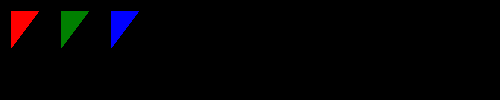

In [24]:
image = Image.new('RGB', (500, 100), 'black')
draw = ImageDraw.Draw(image)

t1 = Triangle(Point(10,10),Point(40,10),Point(10,50))

translationMatrix = np.array([[1,0,50],[0,1,0],[0,0,1]])

t2 = t1.affine(translationMatrix)
t3 = t2.affine(translationMatrix)

print (t1.points(), t2.points())

draw.polygon(t1.points(), outline='black', fill='red')
draw.polygon(t2.points(), outline='black', fill='green')
draw.polygon(t3.points(), outline = 'black', fill = 'blue')

image

### Making a 2D Plane Group

#### Making a Triangle and the Transformation Matrices

Now we have the tools we need to make a 2D plane group! We can start the same way as we did in making an image of triangle translations. We create an image to draw on as well as a triangle that we can use to make other triangles. 

Since we are trying to make many triangles, let's store all the triangles generated into *trianglelist,* and first just put *t1* in that list. This list will later be appended to contain all the triangles we construct. 

Next, we can define a translation matrix that is user-defined to shift the original points of the triangle *t1* to new points. This function is called *transmatrix* that requires the user to input how many units in teh x-direction and the y-direction they would like to shift the original triangle to make a new triangle. 

After this, we can do the same for creating a rotation matrix. In this case, we do the same thing that we did earlier for creating a user-defined array of rotation. 

Following this, we can create matrices for reflecting a triangle. *mirrorY* reflects an object about the y-axis and *mirrorX* reflects an object about the x-axis. 

#### Plane Group Patterns 

Now that we have defined our image to draw on, a triangle to work with, and the matrices we can use copy the original triangle in various orientations across the image, we can now create patterns! Here, we create two patterns to construct a plane group. For the *p2mg* pattern, we use the relfection matrices to generate new triangles based off of already existing ones. For the *p4* pattern, we use the rotation function with an angle of 90 to do the same. 

Again, we can use *affine* along with the triangle that we want to create a copy of and apply a transformation to. We can save each new triangle created into a new variable. For the *p2mg* pattern, we set triangles *t1, t2, t3,* and *t4.* For the *p4* pattern, we set triangles *t5, t6, t7,* and *t8.* 

After these triangles are defined, we can actually save these triangles into an array for *p2mg* and *p4.*

#### Plotting Repititions of the Triangle Patterns 

Now that we have patterns, we need to be able to draw these across the gray image. To do this, we can define two functions:*latticeVectorA* and *latticeVectorB.* The former function shifts the pattern 150 units to the right across the gray image. The latter shifts the pattern 150 units down across the gray image. Within these functions, two square matrices are constructed that can be dotted together to generate a new matrix that is applied to the triangles in the patterns. The matrices constructed from the *xstep* and *ystep* are taken to the power of an inputted *i* and *j,* where *i* will define how many repetitions of the pattern there will be in the x-direction and *j* defines how many repitions of the pattern there will be in the y-direction. 

For example, if *i* is equal to 3, there will be 3 repitions of the pattern across the x-direction, 150 units apart. 

Now, we can set up a forloop to ensure that this actually occurs. In this case, we set up a range 7 for *j* and a range 7 for *i.* Next, we can say that for each triangle in the pattern array, we can append the *trianglelist* created earlier. By appending, we mean adding triangles that have been manipulated by the dot product of the lattice vectors. 

Finally, we can say use *draw.polygon* to plot all the triangles in *trianglelist* array and write *image* to prompt jupyter notebook to show us the image produced! 

__Below we have the pattern *p4.*__

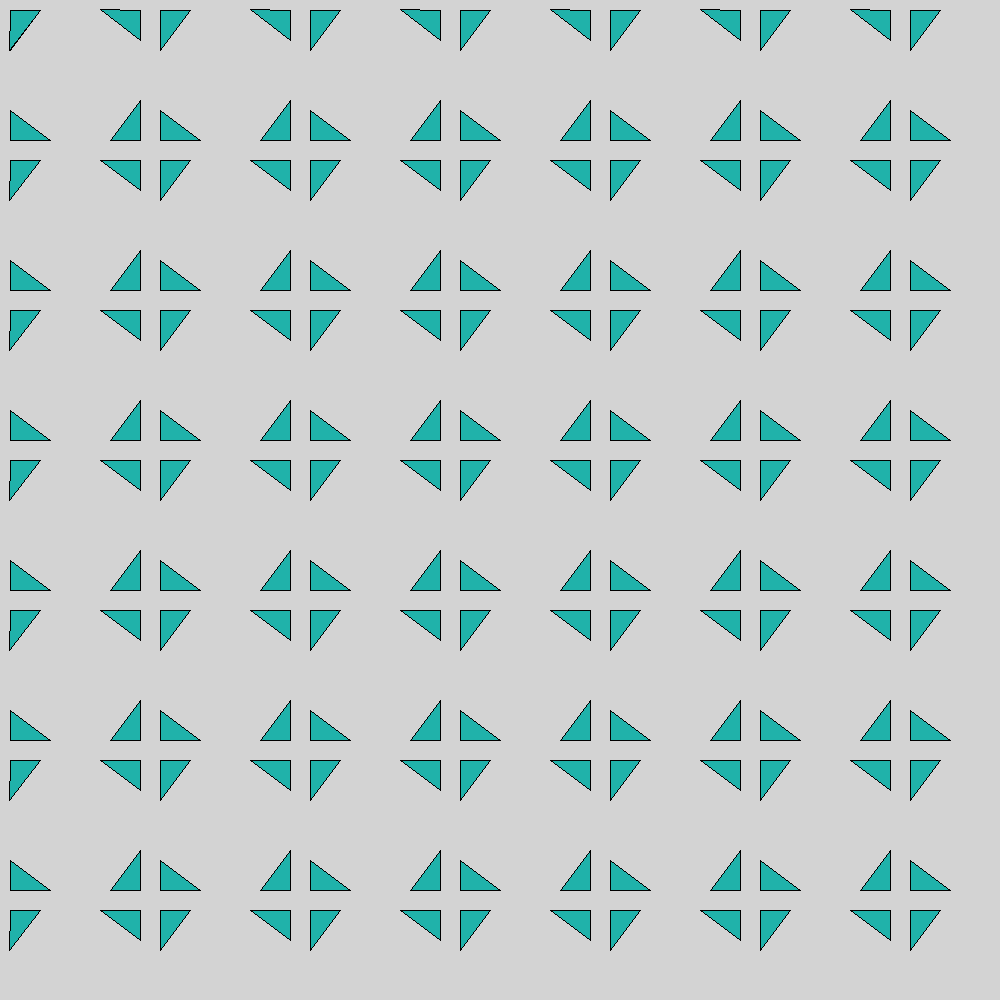

In [28]:
image = Image.new('RGB', (1000, 1000), 'lightgray')
draw = ImageDraw.Draw(image)

t1 = Triangle(Point(10,10),Point(40,10),Point(10,50))

trianglelist = [t1]

def transmatrix(x,y): 
    return np.array([[1,0,x], [0,1,y], [0,0,1]])

def rotatmatrix(theta):
    radtheta = theta*(np.pi/180)
    return np.array([[np.cos(radtheta), np.sin(radtheta), 0],
                     [-np.sin(radtheta),  np.cos(radtheta), 0], [0,0,1]])

mirrorY = np.array([[-1,0,0], [0,1,0], [0,0,1]])
mirrorX = np.array([[1,0,0], [0,-1,0], [0,0,1]])


#for the p2mg patter
t2 = t1.affine(mirrorY)
t3 = t2.affine(mirrorX)
t4 = t3.affine(mirrorY)

#for the p4 pattern 
t5 = t1.affine(rotatmatrix(90))
t6 = t5.affine(rotatmatrix(90))
t7 = t6.affine(rotatmatrix(90))
t8 = t7.affine(rotatmatrix(90))

#Patterns 
p2mg = [t1,t2,t3,t4]
p4 = [t5,t6,t7,t8]

def latticeVectorA(i):
    xstep = 150.0
    ystep = 0.0
    return np.linalg.matrix_power(np.array([[1,0,xstep], [0,1,ystep],[0,0,1]]),i)
def latticeVectorB(j):
    xstep = 0.0
    ystep = 150.0
    return np.linalg.matrix_power(np.array([[1,0,xstep], [0,1,ystep],[0,0,1]]),j)

for j in range(7):
    for i in range(7):
        for t in p4:
            trianglelist.append(t.affine(np.dot(latticeVectorA(i), latticeVectorB(j))))
[draw.polygon(t.points(), outline = 'black', fill = 'lightseagreen') for t in trianglelist];
image